cifファイル( sio2_beta_cristobalite222.cif )とcfgファイル( sio.cfg )のPDF解析

In [1]:
import os, sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))

In [2]:
from core.file import File
from computation.statistics import (histogram,gr,total_gr,SQ,total_SQ,total_FQ,
                                    ncoeff,xcoeff,Gr,Tr,Nr)
import matplotlib.pyplot as plt
%matplotlib inline

cifファイルを読み込む

In [3]:
path = "../data/crystal/sio2_beta_cristobalite222.cif"
f = File.open(path)
atoms = f.getatoms()
print(atoms.symbols)

['O', 'Si']


In [4]:
dr = 0.05
r, hist = histogram(atoms, dr)

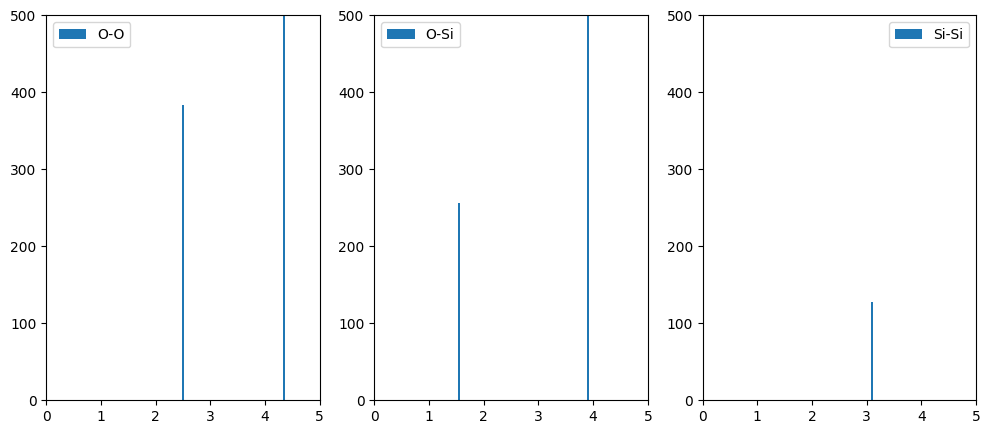

In [5]:
fig = plt.figure(figsize=(12, 5)) 
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.bar(r, hist.T[i], width=dr*0.8, label=atoms.pairs[i])
    ax.set_xlim(0.0,5.0)
    ax.set_ylim(0,500)
    ax.legend()
plt.show()

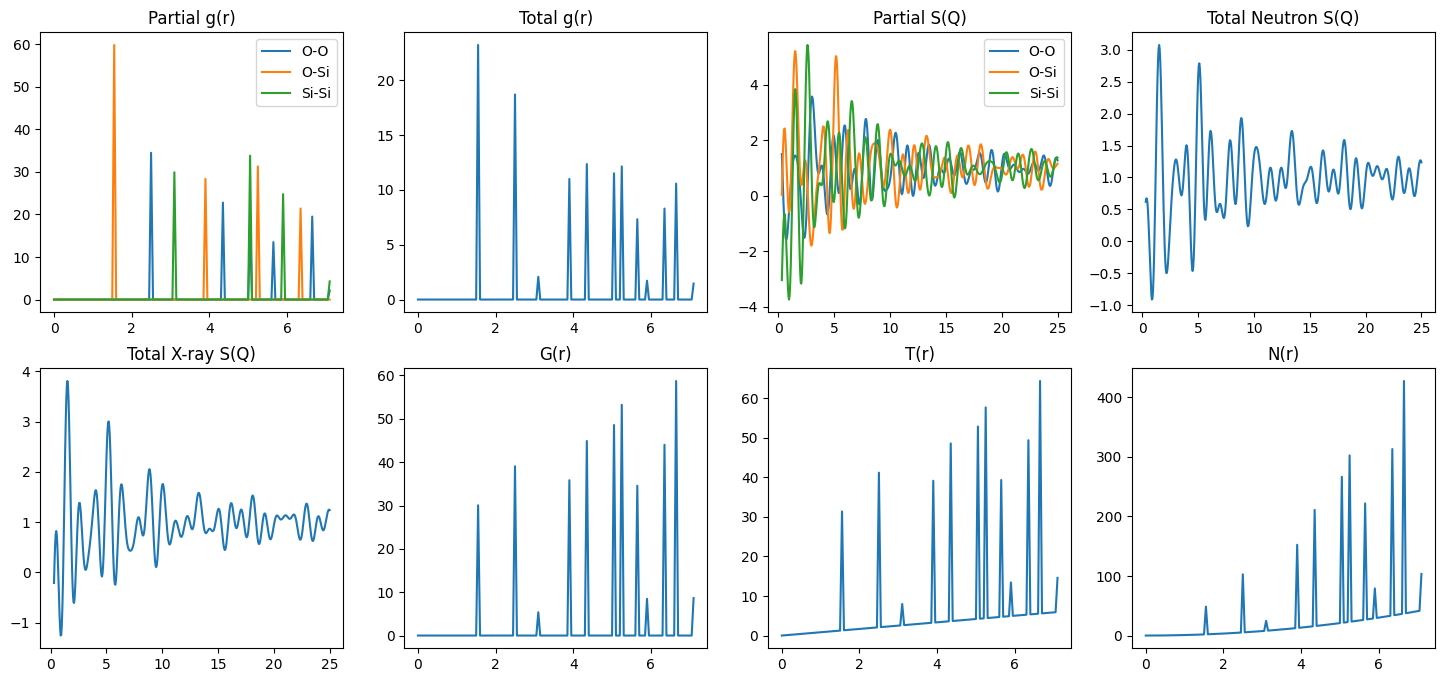

In [6]:
# calculate g(r)
r, gr = gr(atoms,hist,dr)

# calculate Total g(r)
coeff = ncoeff(atoms.symbols,atoms.frac)
total_gr = total_gr(gr,coeff)

# calculate S(Q)
dq = 0.05
qmin = 0.3
qmax = 25.0
q, sq = SQ(atoms,gr,qmin,qmax,dr,dq)

# calculate Total S(Q)
total_sq = total_SQ(sq,coeff)

# calculate F(Q)
coeff = xcoeff(atoms.symbols,atoms.frac,q)
total_fq = total_FQ(sq,coeff)

# calculate Gr
rho = atoms.rho
_Gr = Gr(r,total_gr,rho)

# calculate Tr
_Tr = Tr(r,total_gr,rho)

# calculate Nr
_Nr = Nr(r,_Tr)

# show graph
fig = plt.figure(figsize=(18, 8)) 
ax = fig.add_subplot(2, 4, 1)
ax.set_title('Partial g(r)')
for i in range(3):    
    ax.plot(r, gr.T[i], label=atoms.pairs[i])
    ax.legend()

ax = fig.add_subplot(2, 4, 2)
ax.set_title('Total g(r)')
ax.plot(r,total_gr)

ax = fig.add_subplot(2, 4, 3)
ax.set_title('Partial S(Q)')
for i in range(3):    
    ax.plot(q, sq.T[i], label=atoms.pairs[i])
    ax.legend()

ax = fig.add_subplot(2, 4, 4)
ax.set_title('Total Neutron S(Q)')
ax.plot(q, total_sq)

ax = fig.add_subplot(2, 4, 5)
ax.set_title('Total X-ray S(Q)')
ax.plot(q, total_fq)

ax = fig.add_subplot(2, 4, 6)
ax.set_title('G(r)')
ax.plot(r, _Gr)

ax = fig.add_subplot(2, 4, 7)
ax.set_title('T(r)')
ax.plot(r, _Tr)

ax = fig.add_subplot(2, 4, 8)
ax.set_title('N(r)')
ax.plot(r, _Nr)

plt.show()

cfgファイルを読み込む

In [7]:
path = "../data/amorphous_rmc/sio.cfg"
f = File.open(path)
elements = ['Si','O']
atoms = f.getatoms(0,elements)
dr = 0.05

In [8]:
# calculate histogram
r, hist = histogram(atoms,dr,symbols=['Si','O'])

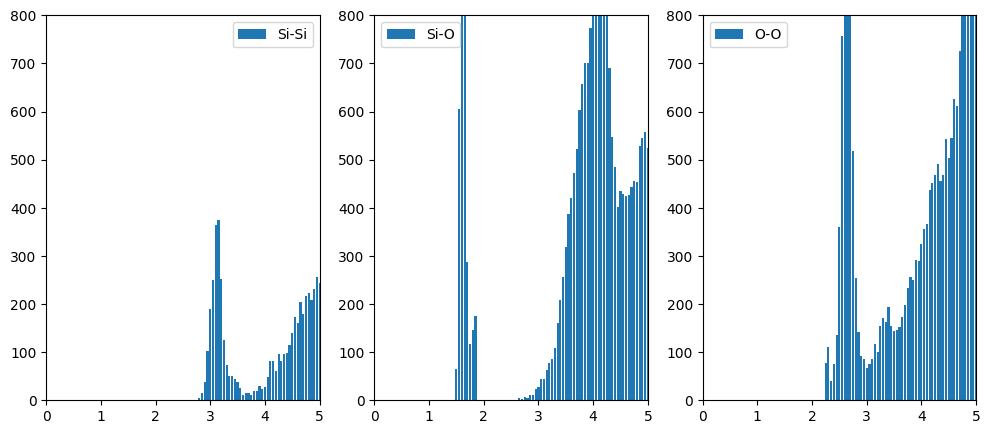

In [9]:
fig = plt.figure(figsize=(12, 5)) 
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.bar(r, hist.T[i], width=dr*0.8, label=atoms.pairs[i])
    ax.set_xlim(0.0,5.0)
    ax.set_ylim(0,800)
    ax.legend()
plt.show()

In [10]:
# calculate g(r)
r, gr = gr(atoms,hist,dr)

# calculate Total g(r)
coeff = ncoeff(atoms.symbols,atoms.frac)
total_gr = total_gr(gr,coeff)

# calculate S(Q)
dq = 0.05
qmin = 0.3
qmax = 25.0
q, sq = SQ(atoms,gr,qmin,qmax,dr,dq)

# calculate Total S(Q)
total_sq = total_SQ(sq,coeff)

# calculate F(Q)
coeff = xcoeff(atoms.symbols,atoms.frac,q)
total_fq = total_FQ(sq,coeff)

# calculate Gr
rho = atoms.rho
_Gr = Gr(r,total_gr,rho)

# calculate Tr
_Tr = Tr(r,total_gr,rho)

# calculate Nr
_Nr = Nr(r,_Tr)

# show graph
fig = plt.figure(figsize=(18, 8)) 
ax = fig.add_subplot(2, 4, 1)
ax.set_title('Partial g(r)')
for i in range(3):    
    ax.plot(r, gr.T[i], label=atoms.pairs[i])
    ax.legend()

ax = fig.add_subplot(2, 4, 2)
ax.set_title('Total g(r)')
ax.plot(r,total_gr)

ax = fig.add_subplot(2, 4, 3)
ax.set_title('Partial S(Q)')
for i in range(3):    
    ax.plot(q, sq.T[i], label=atoms.pairs[i])
    ax.legend()

ax = fig.add_subplot(2, 4, 4)
ax.set_title('Total Neutron S(Q)')
ax.plot(q, total_sq)

ax = fig.add_subplot(2, 4, 5)
ax.set_title('Total X-ray S(Q)')
ax.plot(q, total_fq)

ax = fig.add_subplot(2, 4, 6)
ax.set_title('G(r)')
ax.plot(r, _Gr)

ax = fig.add_subplot(2, 4, 7)
ax.set_title('T(r)')
ax.plot(r, _Tr)

ax = fig.add_subplot(2, 4, 8)
ax.set_title('N(r)')
ax.plot(r, _Nr)

plt.show()

TypeError: 'numpy.ndarray' object is not callable